In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
dfr = pd.read_csv('car.csv') #dataset loaded
dfr.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [3]:
dfr.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,0
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1
397,31.0,4,119.0,82,2720,19.4,82,1


In [4]:
dfr.shape #shape of the dataset

(398, 8)

In [5]:
dfr.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [6]:

for i in dfr.select_dtypes(include="object").columns:
    print(dfr[i].value_counts())
    print("***"*10)

Horsepower
150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: count, Length: 94, dtype: int64
******************************


In [7]:
dfr.isin(['?']).sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [8]:
dfr.Horsepower = dfr.Horsepower.replace('?',np.nan)

In [9]:
#dfr.Horsepower.astype(str).astype(int)

In [10]:
dfr.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [11]:
dfr.isnull().sum()/dfr.shape[0]*100 #To check the percentage of missing data per feature

MPG             0.000000
Cylinders       0.000000
Displacement    0.000000
Horsepower      1.507538
Weight          0.000000
Acceleration    0.000000
Model Year      0.000000
US Made         0.000000
dtype: float64

In [12]:
from sklearn.impute import KNNImputer  #KNN Imputer 
impute = KNNImputer()
import warnings
warnings.filterwarnings('ignore')

for i in dfr.select_dtypes(include = 'object').columns: #loop to apply the imputer
    if i == 'MPG':
        continue
    dfr[i]=impute.fit_transform(dfr[[i]])

In [13]:
dfr.isnull().sum()/dfr.shape[0]*100

MPG             0.0
Cylinders       0.0
Displacement    0.0
Horsepower      0.0
Weight          0.0
Acceleration    0.0
Model Year      0.0
US Made         0.0
dtype: float64

In [14]:
dfr.duplicated().sum()

0

In [15]:
dfr.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [16]:
dfr.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000


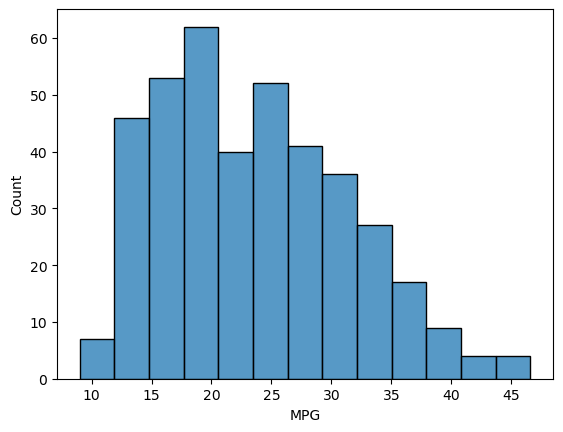

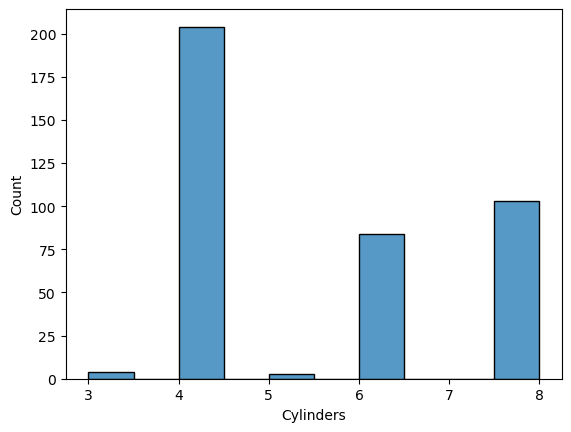

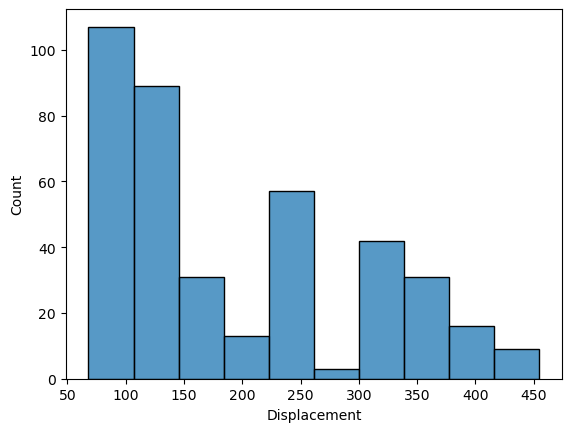

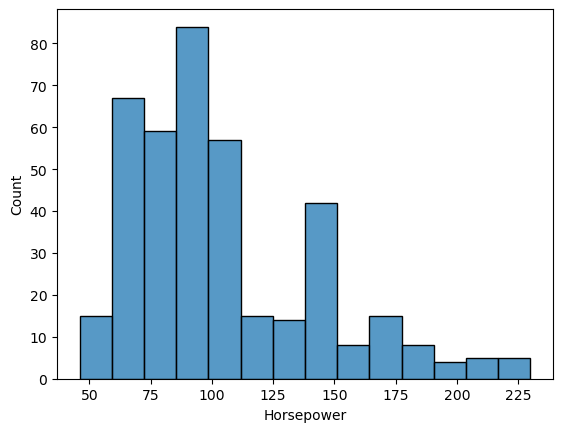

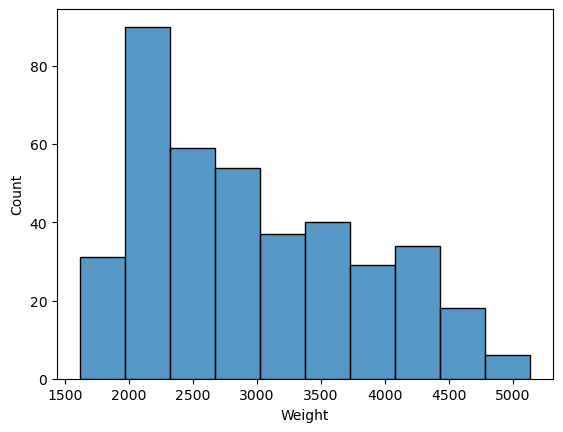

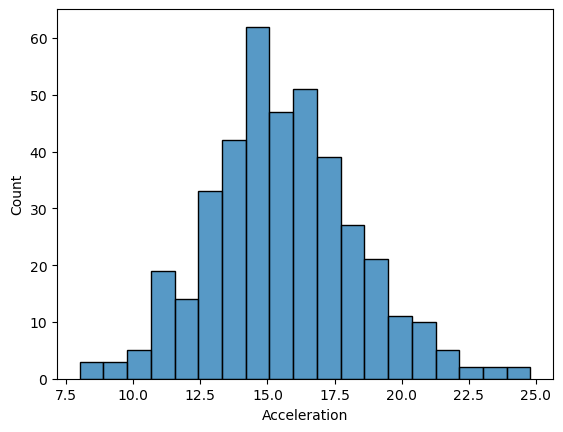

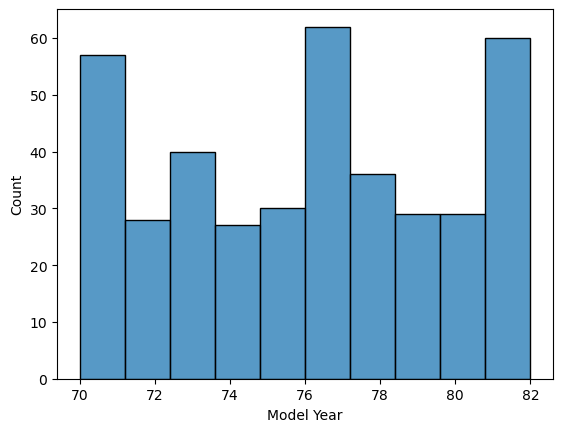

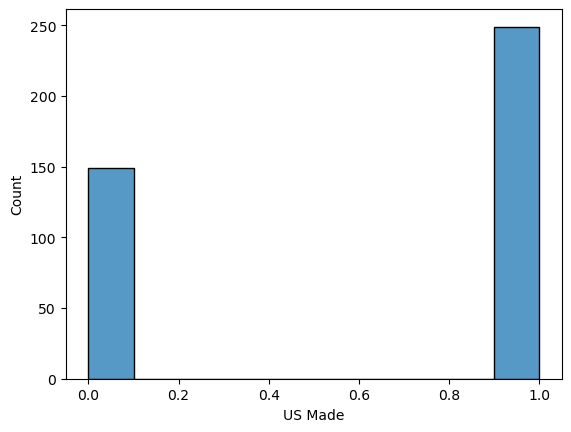

In [17]:
for i in dfr.select_dtypes(include="number").columns: #histogram of all numerical columns
    sns.histplot(data=dfr,x=i)
    plt.show()

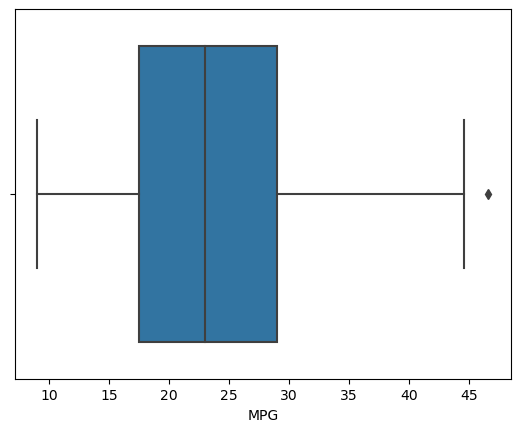

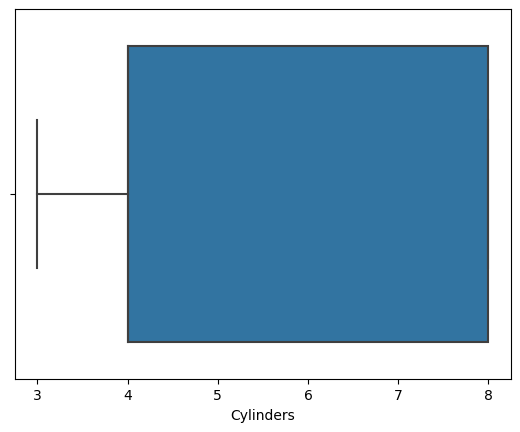

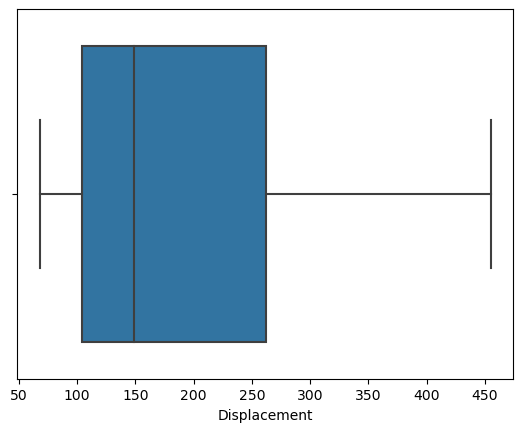

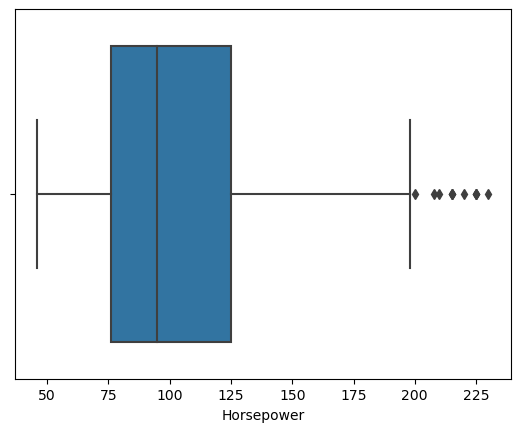

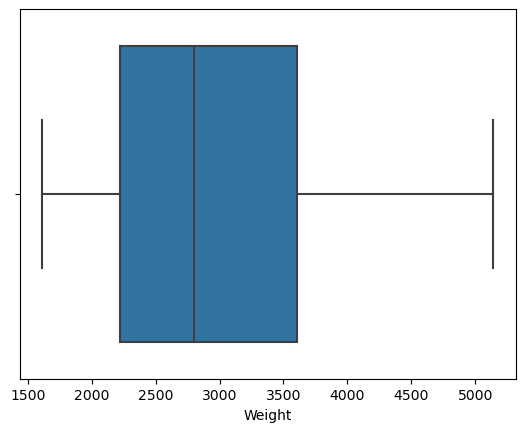

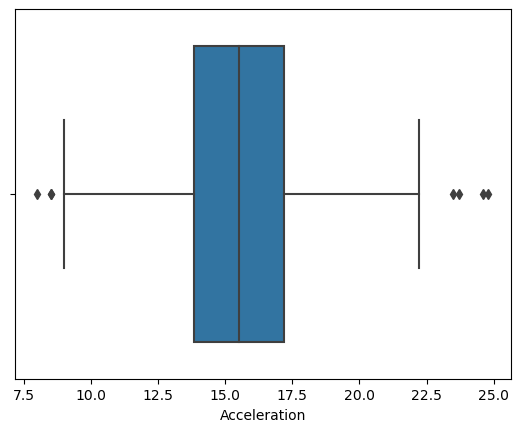

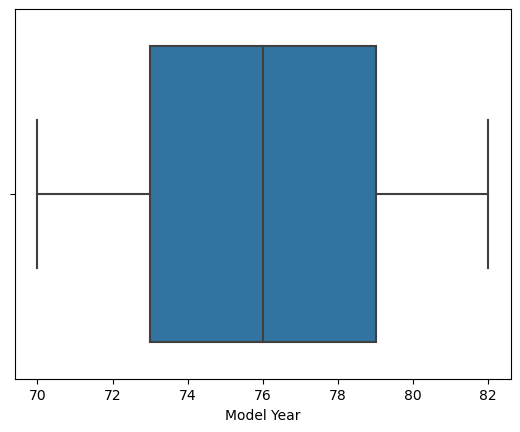

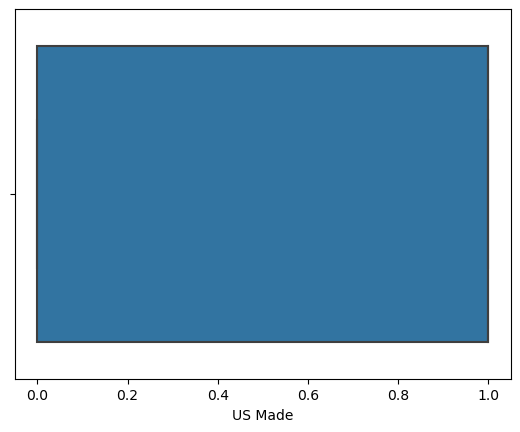

In [18]:
for i in dfr.select_dtypes(include="number").columns: 
    sns.boxplot(data=dfr,x=i) 
    plt.show()

In [19]:
print(dfr.columns)

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'US Made'],
      dtype='object')


In [20]:
def remove_outliers_iqr(data, columns, threshold= 0.8):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        data = data[~((data[column] < (Q1 - threshold * IQR)) | (data[column] > (Q3 + threshold * IQR)))]

    return data

# Assuming 'dfr' is your DataFrame and you want to remove outliers from multiple columns
columns_to_remove_outliers = ['Horsepower', 'Acceleration']  # Add other columns if needed

dfr = remove_outliers_iqr(dfr, columns_to_remove_outliers)

# If you want to print the resulting DataFrame after outlier removal
print(dfr)



      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
14   24.0          4         113.0        95.0    2372          15.0   
15   22.0          6         198.0        95.0    2833          15.5   
16   18.0          6         199.0        97.0    2774          15.5   
17   21.0          6         200.0        85.0    2587          16.0   
18   27.0          4          97.0        88.0    2130          14.5   
..    ...        ...           ...         ...     ...           ...   
391  36.0          4         135.0        84.0    2370          13.0   
392  27.0          4         151.0        90.0    2950          17.3   
393  27.0          4         140.0        86.0    2790          15.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     Model Year  US Made  
14           70        0  
15           70        1  
16           70        1  
17           70        1  


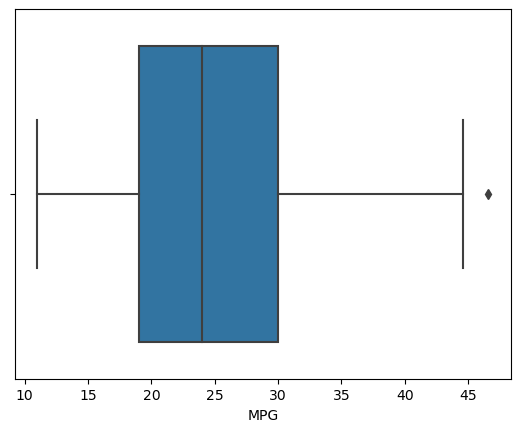

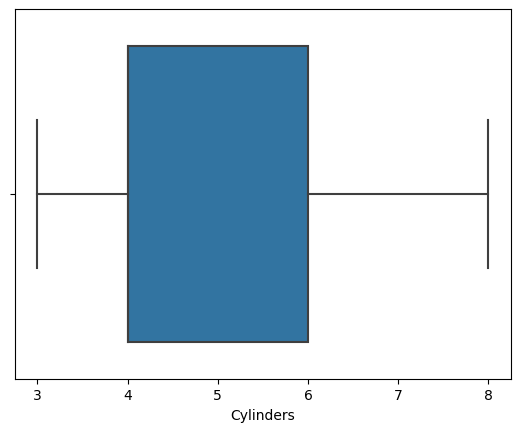

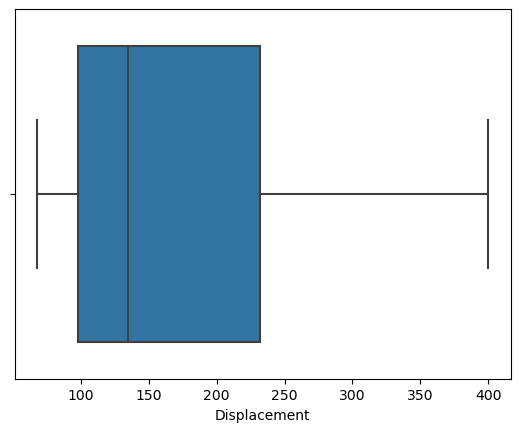

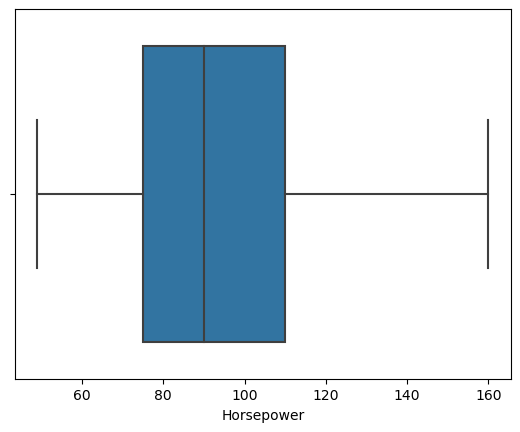

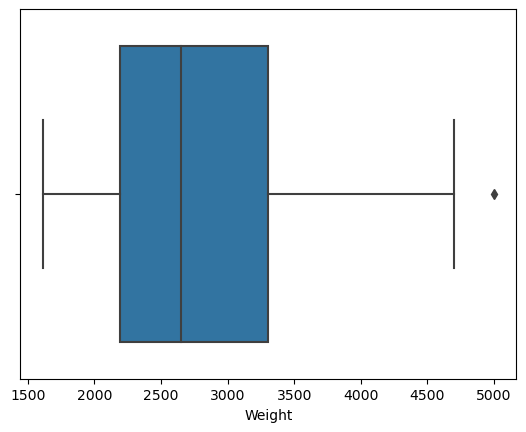

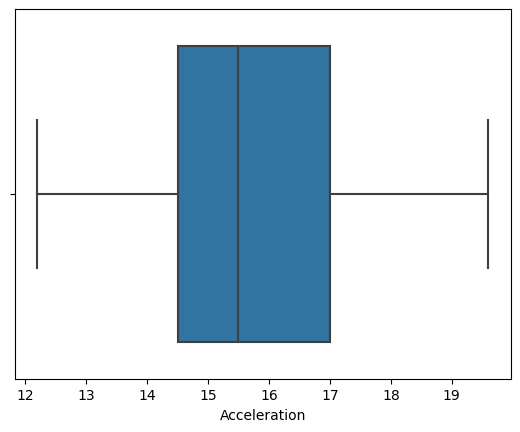

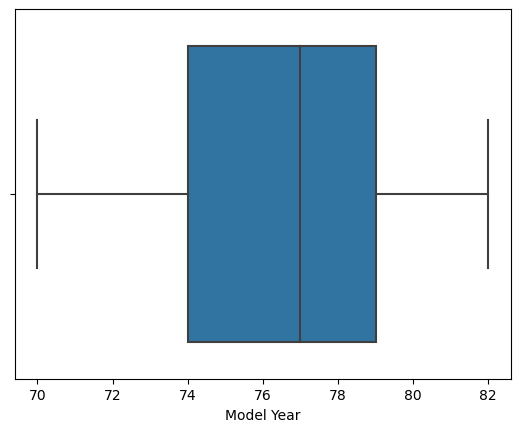

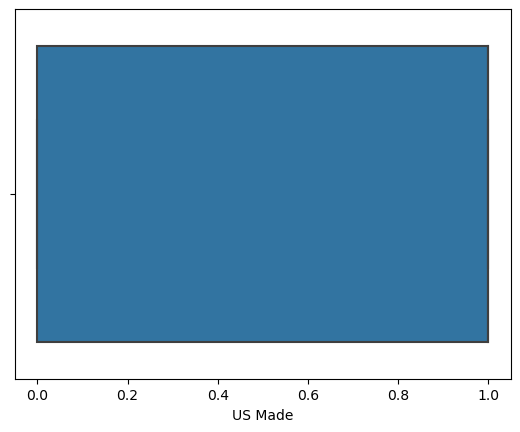

In [21]:
for i in dfr.select_dtypes(include="number").columns: #histogram of all numerical columns
    sns.boxplot(data=dfr,x=i)
    plt.show()

In [22]:
hmp = dfr.corr()
hmp


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
MPG,1.000000,-0.730319,-0.777135,-0.775255,-0.820645,0.234410,0.501061,-0.511604
Cylinders,-0.730319,1.000000,0.954740,0.831969,0.899121,-0.298718,-0.178677,0.567730
Displacement,-0.777135,0.954740,1.000000,0.851627,0.943018,-0.296542,-0.182171,0.659896
Horsepower,-0.775255,0.831969,0.851627,1.000000,0.884491,-0.502327,-0.227875,0.447290
Weight,-0.820645,0.899121,0.943018,0.884491,1.000000,-0.253757,-0.162950,0.592767
Acceleration,0.234410,-0.298718,-0.296542,-0.502327,-0.253757,1.000000,0.099486,-0.067265
Model Year,0.501061,-0.178677,-0.182171,-0.227875,-0.162950,0.099486,1.000000,-0.028010
US Made,-0.511604,0.567730,0.659896,0.447290,0.592767,-0.067265,-0.028010,1.000000


<Axes: >

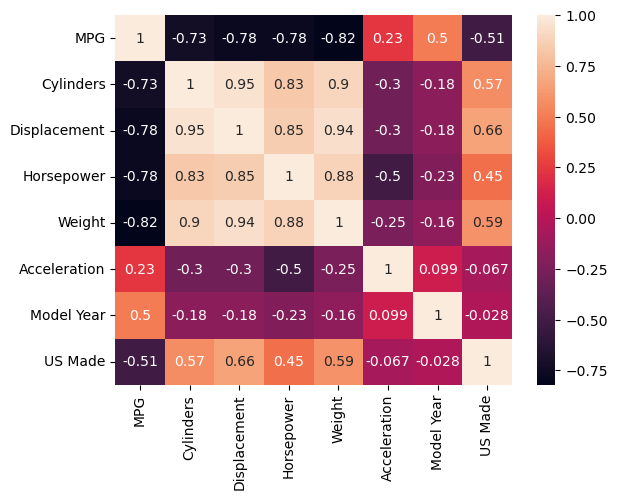

In [23]:
 #heatmap showing correlation cooefficients of numerical values
sns.heatmap(hmp, annot=True)

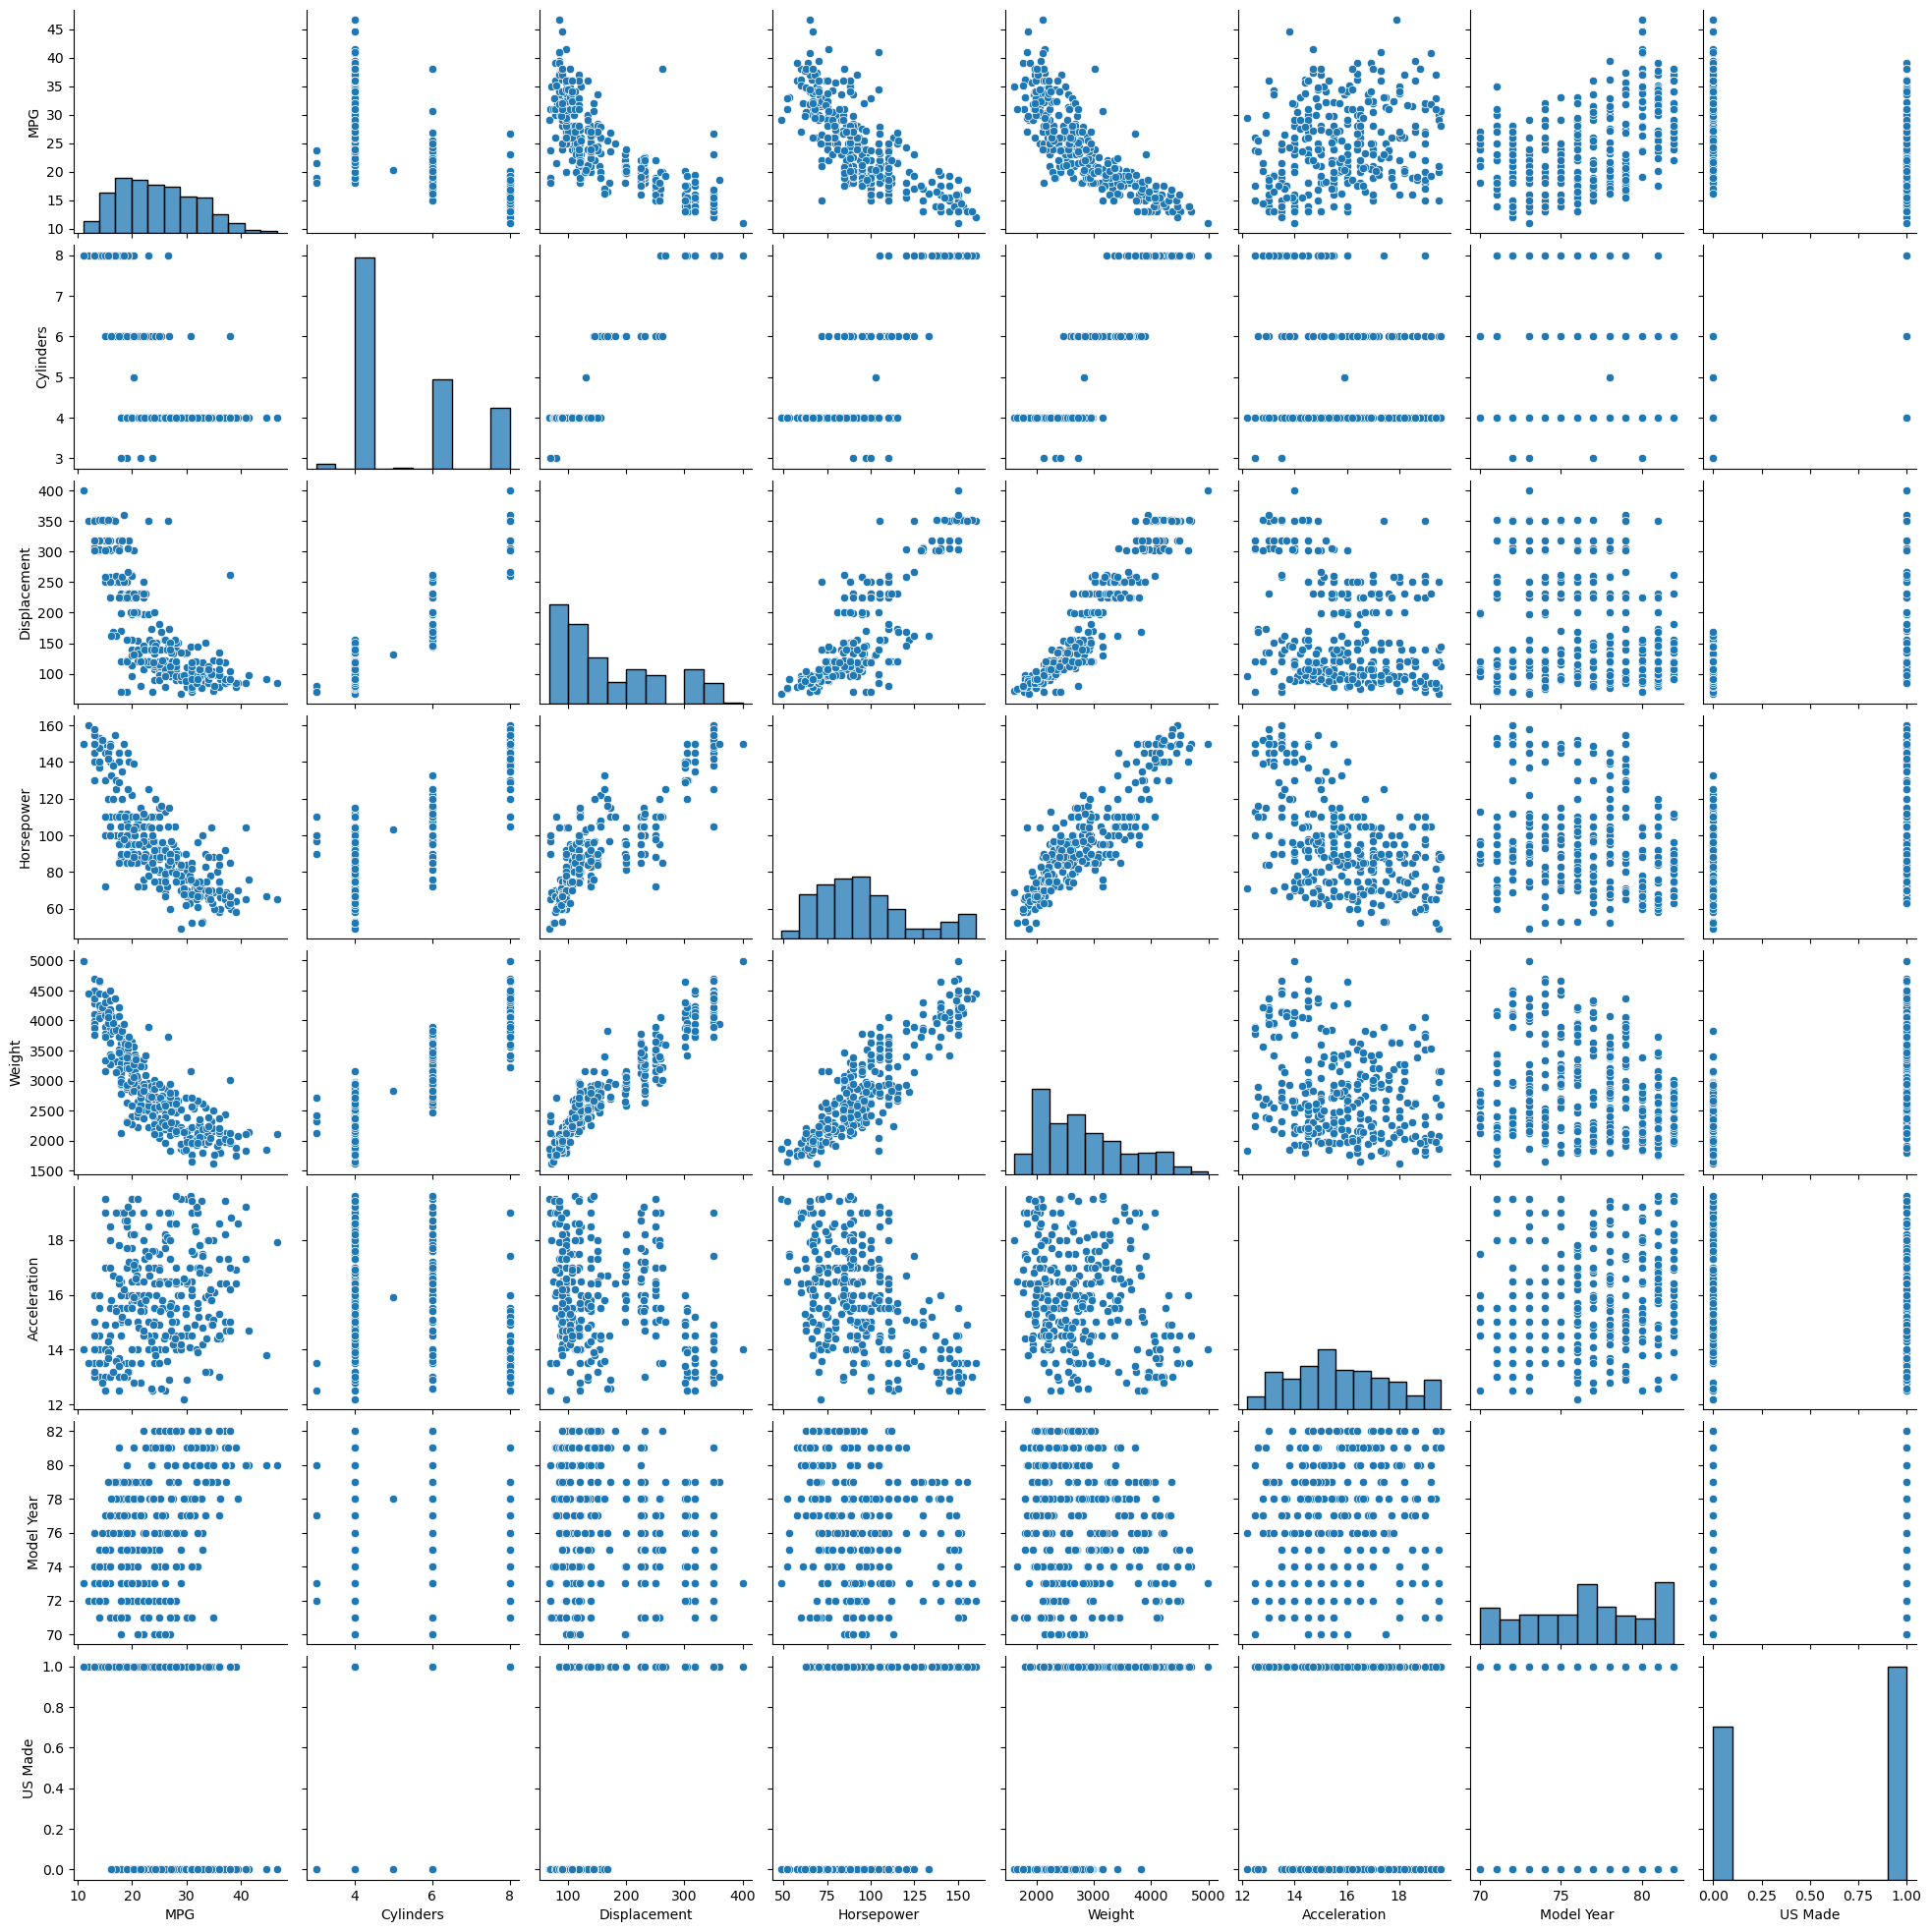

In [24]:
sns.pairplot(dfr)
plt.show()

In [25]:
dfr.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
14,24.0,4,113.0,95.0,2372,15.0,70,0
15,22.0,6,198.0,95.0,2833,15.5,70,1
16,18.0,6,199.0,97.0,2774,15.5,70,1
17,21.0,6,200.0,85.0,2587,16.0,70,1
18,27.0,4,97.0,88.0,2130,14.5,70,0


In [26]:
X = dfr.iloc[:,1:8] #independent variables
y = dfr.iloc[:,0]#dependent variable
# Add a constant term to the independent variable matrix for the intercept
X = sm.add_constant(X)


In [27]:

# Function to calculate VIF for each variable
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Function to remove features with high VIF
def remove_high_vif(X, threshold= 10):
    original_features = X.columns if isinstance(X, pd.DataFrame) else np.arange(X.shape[1])
    
    while True:
        vif_data = calculate_vif(X)
        
        max_vif_index = np.argmax(vif_data["VIF"])
        max_vif_col = original_features[max_vif_index]
        max_vif = vif_data.loc[max_vif_index, "VIF"]

        # Skip removing 'const' column
        if max_vif_col == 'const':
            break

        if max_vif > threshold:
            # Drop from X
            X = X.drop(max_vif_col, axis=1) if isinstance(X, pd.DataFrame) else np.delete(X, max_vif_index, axis=1)
        else:
            break

    return X






In [28]:
X

,const,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
14,1.0,4,113.0,95.0,2372,15.0,70,0
15,1.0,6,198.0,95.0,2833,15.5,70,1
16,1.0,6,199.0,97.0,2774,15.5,70,1
17,1.0,6,200.0,85.0,2587,16.0,70,1
18,1.0,4,97.0,88.0,2130,14.5,70,0
...,...,...,...,...,...,...,...,...
391,1.0,4,135.0,84.0,2370,13.0,82,1
392,1.0,4,151.0,90.0,2950,17.3,82,1
393,1.0,4,140.0,86.0,2790,15.6,82,1
396,1.0,4,120.0,79.0,2625,18.6,82,1


In [29]:
from sklearn.model_selection import train_test_split #Train/Test data split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

X_train = remove_high_vif(X_train)



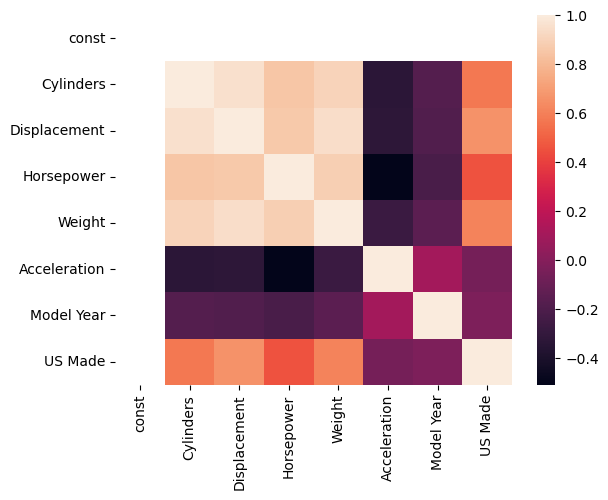

In [30]:
hmp1 = X_train.corr()
sns.heatmap(hmp1)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     159.2
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           5.86e-88
Time:                        21:37:22   Log-Likelihood:                -653.53
No. Observations:                 256   AIC:                             1323.
Df Residuals:                     248   BIC:                             1351.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -9.8890      5.498     -1.799   

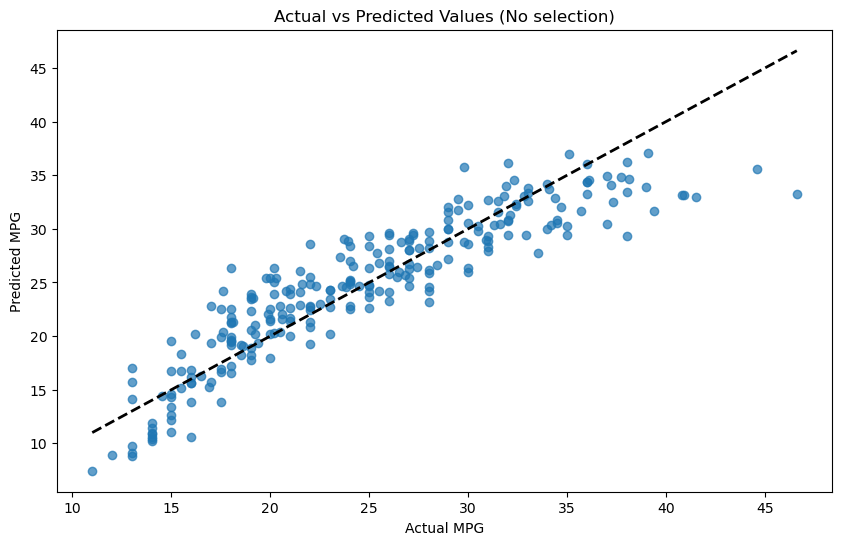

In [48]:
# Fit the model on the training data
model = sm.OLS(y_train, X_train).fit()
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Print a summary of the regression
print(model.summary())

# Get predicted values on the training set
y_pred_train = model.predict(sm.add_constant(X_train))

# Visualize actual vs predicted values with the best fit line
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.7)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--k', linewidth=2)  # Diagonal line
plt.title("Actual vs Predicted Values (No selection)")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.show()

Selected features (Forward Selection): ['const', 'Weight', 'Model Year', 'US Made', 'Displacement', 'Horsepower']
                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     224.2
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           3.22e-90
Time:                        20:37:24   Log-Likelihood:                -653.75
No. Observations:                 256   AIC:                             1319.
Df Residuals:                     250   BIC:                             1341.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------

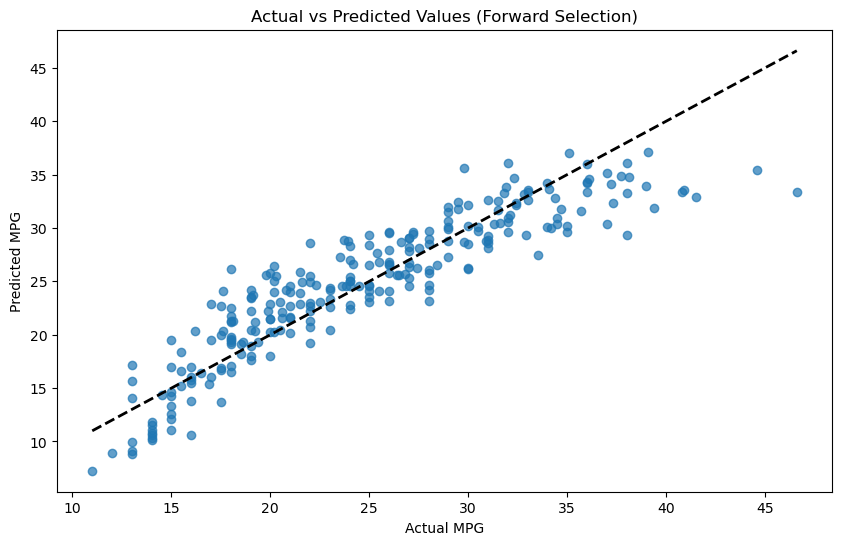

In [32]:

def forward_selection(X, y, significance_level=0.05):
    included_features = []
    while True:
        remaining_features = list(set(X.columns) - set(included_features))
        new_pvalues = pd.Series(index=remaining_features)

        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[included_features + [feature]])).fit()
            new_pvalues[feature] = model.pvalues[feature]

        min_p_value = new_pvalues.min()

        if min_p_value < significance_level:
            included_features.append(new_pvalues.idxmin())
        else:
            break

    return included_features

selected_features_forward = forward_selection(X_train, y_train)
print("Selected features (Forward Selection):", selected_features_forward)

# Fit the model using the selected features
model_forward = sm.OLS(y_train, sm.add_constant(X_train[selected_features_forward])).fit()
print(model_forward.summary())

# Get predicted values on the training set
y_pred_forward = model_forward.predict(sm.add_constant(X_train[selected_features_forward]))

# Visualize actual vs predicted values with the best fit line
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_forward, alpha=0.7)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--k', linewidth=2)  # Diagonal line
plt.title("Actual vs Predicted Values (Forward Selection)")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.show()

Selected features (Backward Elimination): ['const', 'Displacement', 'Horsepower', 'Weight', 'Model Year', 'US Made']
                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     224.2
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           3.22e-90
Time:                        20:37:24   Log-Likelihood:                -653.75
No. Observations:                 256   AIC:                             1319.
Df Residuals:                     250   BIC:                             1341.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------

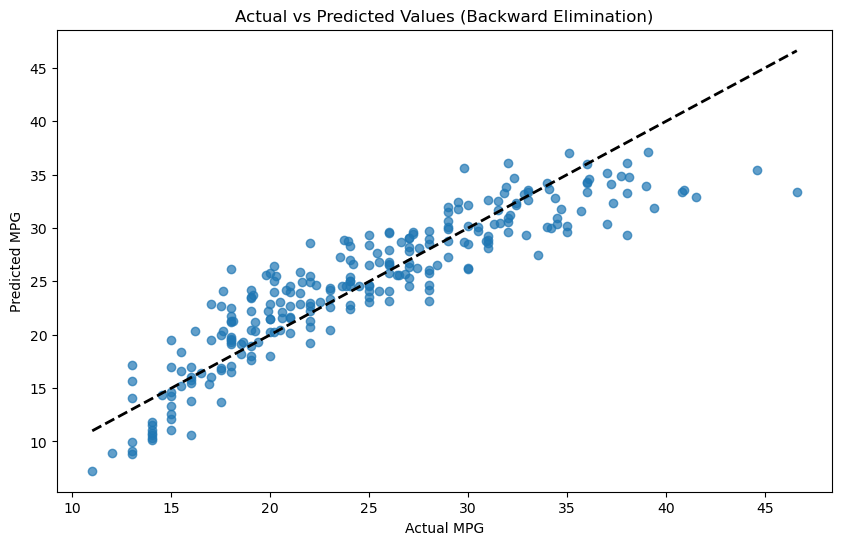

In [33]:
def backward_elimination(X, y, significance_level=0.05):
    included_features = list(X.columns)
    while True:
        model = sm.OLS(y, sm.add_constant(X[included_features])).fit()
        max_p_value = model.pvalues.drop('const').max()

        if max_p_value >= significance_level:
            excluded_feature = model.pvalues.idxmax()
            included_features.remove(excluded_feature)
        else:
            break

    return included_features

selected_features_backward = backward_elimination(X_train, y_train)
print("Selected features (Backward Elimination):", selected_features_backward)

# Fit the model using the selected features
model_backward = sm.OLS(y_train, sm.add_constant(X_train[selected_features_backward])).fit()
print(model_backward.summary())

# Get predicted values on the training set
y_pred_backward = model_backward.predict(sm.add_constant(X_train[selected_features_backward]))

# Visualize actual vs predicted values with the best fit line
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_backward, alpha=0.7)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--k', linewidth=2)  # Diagonal line
plt.title("Actual vs Predicted Values (Backward Elimination)")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.show()


Add  const                          with p-value 0.000000
Add  Weight                         with p-value 0.000000
Add  Model Year                     with p-value 0.000000
Add  US Made                        with p-value 0.024693
Add  Displacement                   with p-value 0.008040
Add  Horsepower                     with p-value 0.005074
Selected Features:
['const', 'Weight', 'Model Year', 'US Made', 'Displacement', 'Horsepower']
                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     224.2
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           3.22e-90
Time:                        20:37:25   Log-Likelihood:                -653.75
No. Observations:                 256   AIC:                             1319.
Df Re

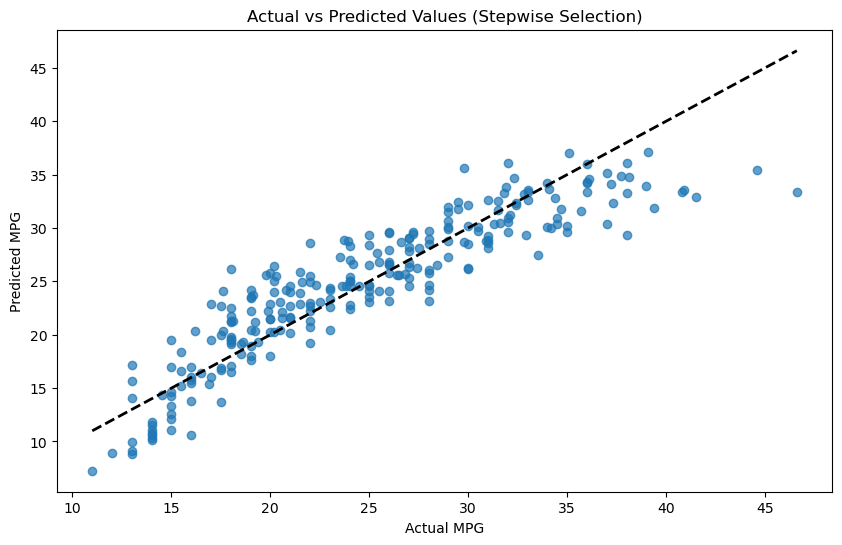

In [34]:
import statsmodels.api as sm

def stepwise_selection(X, y, initial_features=[], threshold_in=0.05, threshold_out=0.05, verbose=True):
    included_features = list(initial_features)
    while True:
        changed = False
        # Forward step
        excluded_features = list(set(X.columns) - set(included_features))
        new_pval = pd.Series(index=excluded_features, dtype=float)
        for new_feature in excluded_features:
            model = sm.OLS(y, sm.add_constant(X[included_features + [new_feature]])).fit()
            new_pval[new_feature] = model.pvalues[new_feature]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included_features.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:<30} with p-value {:.6f}'.format(best_feature, best_pval))

        
        # Backward step
        model = sm.OLS(y, sm.add_constant(X[included_features])).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included_features.remove(worst_feature)
            if verbose:
                print('Drop {:<30} with p-value {:.6f}'.format(worst_feature, worst_pval))

        
        if not changed:
            break
    
    return included_features

# Assuming X_train and y_train are your training data
selected_features = stepwise_selection(X_train, y_train)

# Print the selected features
print("Selected Features:")
print(selected_features)

# Fit the model with the selected features
model_stepwise = sm.OLS(y_train, sm.add_constant(X_train[selected_features])).fit()

# Print the summary of the model
print(model_stepwise.summary())


# Get predicted values on the training set
y_pred_train = model_stepwise.predict(sm.add_constant(X_train[selected_features]))

# Visualize actual vs predicted values with the best fit line
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.7)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--k', linewidth=2)  # Diagonal line
plt.title("Actual vs Predicted Values (Stepwise Selection)")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     514.2
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           7.47e-90
Time:                        20:37:25   Log-Likelihood:                -663.93
No. Observations:                 256   AIC:                             1334.
Df Residuals:                     253   BIC:                             1344.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.1542      4.702     -2.797      0.0

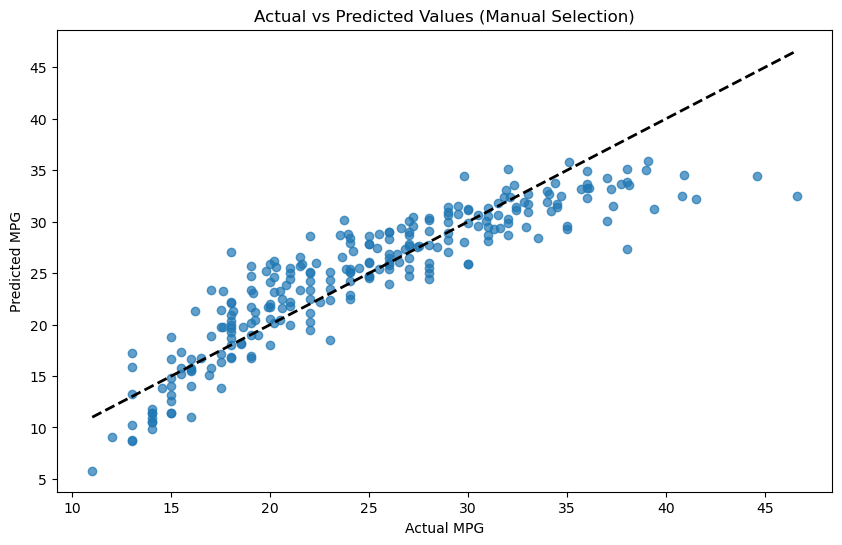

In [35]:
import statsmodels.api as sm

# Assuming X_train and y_train are your training data
selected_features = ['const', 'Weight', 'Model Year']

# Fit the model with the selected features
model_manual = sm.OLS(y_train, sm.add_constant(X_train[selected_features])).fit()

# Print the summary of the model
print(model_manual.summary())

# Get predicted values on the training set
y_pred_train_manual = model_manual.predict(sm.add_constant(X_train[selected_features]))

# Visualize actual vs predicted values with the best fit line
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train_manual, alpha=0.7)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--k', linewidth=2)  # Diagonal line
plt.title("Actual vs Predicted Values (Manual Selection)")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.show()



In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# ... (your existing code)

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'R-squared', 'MSE', 'RMSE', 'AIC'])

# Model without feature selection
X_train_no_selection = sm.add_constant(X_train)
model_no_selection = sm.OLS(y_train, X_train_no_selection).fit()
y_pred_no_selection = model_no_selection.predict(X_train_no_selection)
r_squared_no_selection = r2_score(y_train, y_pred_no_selection)
mse_no_selection = mean_squared_error(y_train, y_pred_no_selection)
rmse_no_selection = np.sqrt(mse_no_selection)
aic_no_selection = model_no_selection.aic
results_df = pd.concat([results_df, pd.DataFrame({'Model': ['No Selection'], 'R-squared': [r_squared_no_selection], 'MSE': [mse_no_selection], 'RMSE': [rmse_no_selection], 'AIC': [aic_no_selection]})], ignore_index=True)

# Model with stepwise selection
selected_features_stepwise = stepwise_selection(X_train, y_train)  # Assuming stepwise_selection is correctly defined
X_train_stepwise = sm.add_constant(X_train[selected_features_stepwise])
model_stepwise = sm.OLS(y_train, X_train_stepwise).fit()
y_pred_stepwise = model_stepwise.predict(X_train_stepwise)
r_squared_stepwise = r2_score(y_train, y_pred_stepwise)
mse_stepwise = mean_squared_error(y_train, y_pred_stepwise)
rmse_stepwise = np.sqrt(mse_stepwise)
aic_stepwise = model_stepwise.aic
results_df = pd.concat([results_df, pd.DataFrame({'Model': ['Stepwise Selection'], 'R-squared': [r_squared_stepwise], 'MSE': [mse_stepwise], 'RMSE': [rmse_stepwise], 'AIC': [aic_stepwise]})], ignore_index=True)

# Model with forward selection
selected_features_forward = forward_selection(X_train, y_train)  # Assuming forward_selection is correctly defined
X_train_forward = sm.add_constant(X_train[selected_features_forward])
model_forward = sm.OLS(y_train, X_train_forward).fit()
y_pred_forward = model_forward.predict(X_train_forward)
r_squared_forward = r2_score(y_train, y_pred_forward)
mse_forward = mean_squared_error(y_train, y_pred_forward)
rmse_forward = np.sqrt(mse_forward)
aic_forward = model_forward.aic
results_df = pd.concat([results_df, pd.DataFrame({'Model': ['Forward Selection'], 'R-squared': [r_squared_forward], 'MSE': [mse_forward], 'RMSE': [rmse_forward], 'AIC': [aic_forward]})], ignore_index=True)

# Model with backward elimination
selected_features_backward = backward_elimination(X_train, y_train)  # Assuming backward_elimination is correctly defined
X_train_backward = sm.add_constant(X_train[selected_features_backward])
model_backward = sm.OLS(y_train, X_train_backward).fit()
y_pred_backward = model_backward.predict(X_train_backward)
r_squared_backward = r2_score(y_train, y_pred_backward)
mse_backward = mean_squared_error(y_train, y_pred_backward)
rmse_backward = np.sqrt(mse_backward)
aic_backward = model_backward.aic
results_df = pd.concat([results_df, pd.DataFrame({'Model': ['Backward Elimination'], 'R-squared': [r_squared_backward], 'MSE': [mse_backward], 'RMSE': [rmse_backward], 'AIC': [aic_backward]})], ignore_index=True)

# Manual selection
selected_features_manual = ['const', 'Weight', 'Model Year']
model_manual = sm.OLS(y_train, sm.add_constant(X_train[selected_features_manual])).fit()
y_pred_manual = model_manual.predict(sm.add_constant(X_train[selected_features_manual]))
r_squared_manual = r2_score(y_train, y_pred_manual)
mse_manual = mean_squared_error(y_train, y_pred_manual)
rmse_manual = np.sqrt(mse_manual)
aic_manual = model_manual.aic
results_df = pd.concat([results_df, pd.DataFrame({'Model': ['Manual Selection'], 'R-squared': [r_squared_manual], 'MSE': [mse_manual], 'RMSE': [rmse_manual], 'AIC': [aic_manual]})], ignore_index=True)

# Display the results DataFrame
results_df


Add  const                          with p-value 0.000000
Add  Weight                         with p-value 0.000000
Add  Model Year                     with p-value 0.000000
Add  US Made                        with p-value 0.024693
Add  Displacement                   with p-value 0.008040
Add  Horsepower                     with p-value 0.005074


,Model,R-squared,MSE,RMSE,AIC
0,No Selection,0.818,9.658,3.108,1323.052
1,Stepwise Selection,0.818,9.675,3.110,1319.491
2,Forward Selection,0.818,9.675,3.110,1319.491
3,Backward Elimination,0.818,9.675,3.110,1319.491
4,Manual Selection,0.803,10.476,3.237,1333.862


In [53]:
print(results_df)

                      R-squared    MSE  RMSE      AIC
Model                                                
No Selection              0.818  9.658 3.108 1323.052
Stepwise Selection        0.818  9.675 3.110 1319.491
Forward Selection         0.818  9.675 3.110 1319.491
Backward Elimination      0.818  9.675 3.110 1319.491
Manual Selection          0.803 10.476 3.237 1333.862


In [51]:
results_df = results_df.set_index('Model')

In [52]:
results_df

,R-squared,MSE,RMSE,AIC
Model,,,,
No Selection,0.818,9.658,3.108,1323.052
Stepwise Selection,0.818,9.675,3.110,1319.491
Forward Selection,0.818,9.675,3.110,1319.491
Backward Elimination,0.818,9.675,3.110,1319.491
Manual Selection,0.803,10.476,3.237,1333.862
